In [ ]:
# use v1.2 datasets; load from our repo for convenience
csv_urls = {
    'members': 'https://raw.githubusercontent.com/ZoeLeBlanc/unknown_borrowers/main/dataset_generator/source_data/SCoData_members_v1.2_2022-01.csv',
    'books': 'https://raw.githubusercontent.com/ZoeLeBlanc/unknown_borrowers/main/dataset_generator/source_data/SCoData_books_v1.2_2022-01.csv',
    'events': 'https://raw.githubusercontent.com/ZoeLeBlanc/unknown_borrowers/main/dataset_generator/source_data/SCoData_events_v1.2_2022-01.csv',
    # project-specific data
    'partial_borrowers': 'https://github.com/ZoeLeBlanc/unknown_borrowers/raw/main/dataset_generator/data/partial_borrowers_collapsed.csv',
    'borrow_overrides': 'https://raw.githubusercontent.com/ZoeLeBlanc/unknown_borrowers/main/dataset_generator/data/long_borrow_overrides.csv'
}

In [ ]:
import pandas as pd

# load books
books_df = pd.read_csv(csv_urls['books'])

In [ ]:
total_books = books_df.shape[0]
total_books

6020

In [ ]:
borrowed_books = books_df[books_df.borrow_count != 0]
total_borrowed_books = borrowed_books.shape[0]
total_borrowed_books

5683

In [ ]:
uncertain_books = books_df[books_df.uncertain].shape[0]
uncertain_books

475

In [ ]:
total_borrowed_books - uncertain_books

5208

In [ ]:
books_df

,uri,title,author,editor,translator,introduction,illustrator,photographer,year,format,uncertain,ebook_url,volumes_issues,notes,event_count,borrow_count,purchase_count,circulation_years,updated
0,https://shakespeareandco.princeton.edu/books/m...,Le Morte d'Arthur,"Malory, Thomas",NaN,NaN,NaN,NaN,NaN,1485.0,Book,False,https://archive.org/details/mortedarthur02malo,NaN,NaN,7,7,0,1930;1932;1937;1938;1939,2021-11-14T13:57:51.282365+00:00
1,https://shakespeareandco.princeton.edu/books/m...,Utopia,"More, Thomas",NaN,NaN,NaN,NaN,NaN,1516.0,Book,False,https://archive.org/details/utopiamo00more,NaN,NaN,2,2,0,1930;1950;1951,2021-10-31T17:47:49.103296+00:00
2,https://shakespeareandco.princeton.edu/books/n...,Gorboduc,"Norton, Thomas",NaN,NaN,NaN,NaN,NaN,1561.0,Book,False,NaN,NaN,NaN,1,1,0,1950,2020-06-29T03:49:47+00:00
3,https://shakespeareandco.princeton.edu/books/l...,Euphues: The Anatomy of Wit,"Lyly, John",NaN,NaN,NaN,NaN,NaN,1578.0,Book,False,https://archive.org/details/cu31924013122084,NaN,NaN,1,1,0,1941,2021-06-05T15:37:07+00:00
4,https://shakespeareandco.princeton.edu/books/s...,The Shepheard's Calendar,"Spenser, Edmund",NaN,NaN,NaN,NaN,NaN,1579.0,Book,False,https://archive.org/details/shepheardscalend00...,NaN,NaN,1,1,0,1941,2021-11-06T12:26:04.482734+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6015,https://shakespeareandco.princeton.edu/books/b...,Wuthering Heights and Agnes Grey,"Brontë, Emily;Brontë, Anne",NaN,NaN,NaN,NaN,NaN,NaN,Book,False,https://archive.org/details/wutheringheight04b...,NaN,NaN,3,3,0,1937;1938;1939,2020-06-02T21:01:35+00:00
6016,https://shakespeareandco.princeton.edu/books/c...,Yale Review,NaN,"Cross, Wilbur L.",NaN,NaN,NaN,NaN,NaN,Periodical,False,NaN,NaN,NaN,5,5,0,1936;1933;1934;1935,2020-06-11T12:07:01+00:00
6017,https://shakespeareandco.princeton.edu/books/y...,Yeats,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,Unidentified. By or about W. B. Yeats.,1,1,0,1920,2021-11-15T22:52:17.216749+00:00
6018,https://shakespeareandco.princeton.edu/books/y...,Yeats: Various Articles By & On,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,Unidentified.,1,1,0,1939,2021-11-17T13:22:00.439805+00:00


In [ ]:
# sort by most borrowed; drop unborrowed titles
most_borrowed_books_df = borrowed_books.sort_values('borrow_count', ascending=False).reindex()
most_borrowed_books_df[['title', 'borrow_count']].head()

,title,borrow_count
5905,The New Statesman and Nation,115
5955,Time and Tide,109
5906,The New Yorker,72
1305,A Portrait of the Artist as a Young Man,56
1200,Dubliners,47


In [ ]:
most_borrowed_books_df[['title', 'borrow_count']].tail()

,title,borrow_count
1430,Ardours and Endurances,1
3859,Satan's Circus and Other Stories,1
1428,Adolphe,1
3861,Save Me the Waltz,1
6019,Zola,1


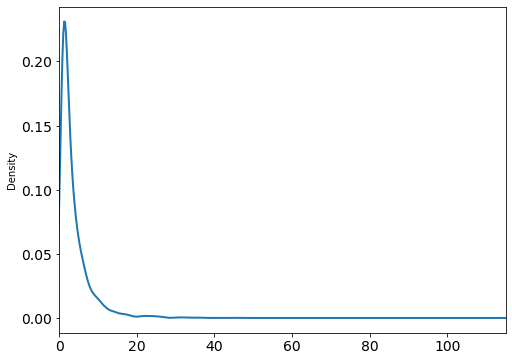

In [ ]:
most_borrowed_books_df.borrow_count.plot.density(figsize=(8, 6),
                               fontsize=14,
                               xlim=(0, 115),
                               linewidth=2, rot=0)

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:518: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(self.xlim)


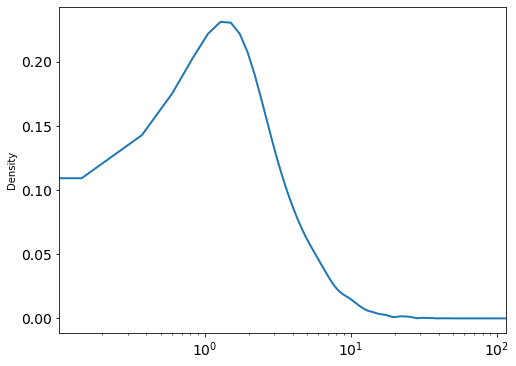

In [ ]:
# what if we plot on a log scale?
most_borrowed_books_df.borrow_count.plot.density(figsize=(8, 6),
                               fontsize=14,
                               xlim=(0, 115),
                               linewidth=2, logx=True)

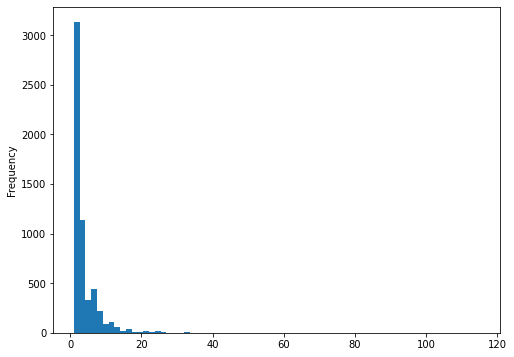

In [ ]:
most_borrowed_books_df.borrow_count.plot.hist(bins=70, figsize=(8, 6))

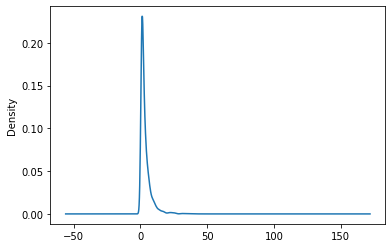

In [ ]:
most_borrowed_books_df.borrow_count.plot.density()

In [ ]:
most_borrowed_books_df['i'] = most_borrowed_books_df.index

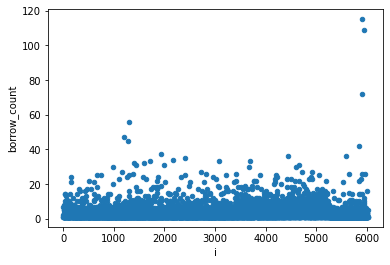

In [ ]:
most_borrowed_books_df.plot.scatter(y='borrow_count', x='i')

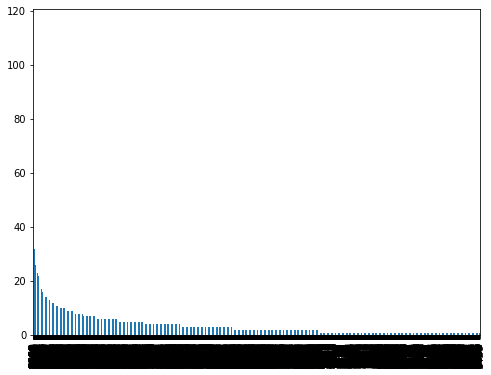

In [ ]:


most_borrowed_books_df.plot.bar(y='borrow_count', linewidth=0, figsize=(8, 6), legend=None)

In [ ]:
!pip install powerlaw

In [ ]:
import powerlaw
print(powerlaw.__version__)



1.5


In [ ]:
data = most_borrowed_books_df.borrow_count
data

5905    115
5955    109
5906     72
1305     56
1200     47
       ... 
1430      1
3859      1
1428      1
3861      1
6019      1
Name: borrow_count, Length: 5683, dtype: int64

In [ ]:
fit = powerlaw.Fit(data)
fit.power_law.alpha
fit.power_law.sigma
fit.distribution_compare('power_law', 'exponential')

Calculating best minimal value for power law fit


(10.546177991210914, 0.026240956503554343)

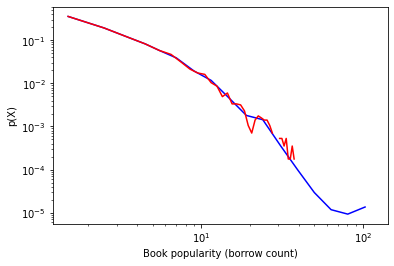

In [ ]:
figPDF = powerlaw.plot_pdf(data, color='b')
powerlaw.plot_pdf(data, linear_bins=True, color='r', ax=figPDF)
####
figPDF.set_ylabel("p(X)")
figPDF.set_xlabel(r"Book popularity (borrow count)")
# figname = 'FigPDF'
# savefig(figname+'.eps', bbox_inches='tight')
figPDF

Calculating best minimal value for power law fit


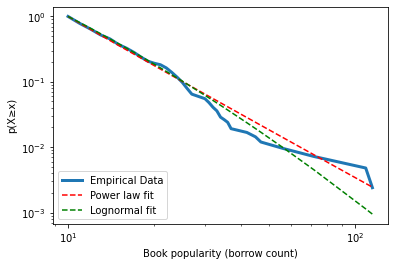

In [ ]:

fit = powerlaw.Fit(data, discrete=True)
####
fit.distribution_compare('power_law', 'lognormal')
fig = fit.plot_ccdf(linewidth=3, label='Empirical Data')
fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='--', label='Power law fit')
fit.lognormal.plot_ccdf(ax=fig, color='g', linestyle='--', label='Lognormal fit')
####
fig.set_ylabel(u"p(X≥x)")
fig.set_xlabel("Book popularity (borrow count)")
handles, labels = fig.get_legend_handles_labels()
fig.legend(handles, labels, loc=3)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


/usr/local/lib/python3.7/dist-packages/powerlaw.py:1195: RuntimeWarning: divide by zero encountered in double_scalars
  C = 1.0/C
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:597: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


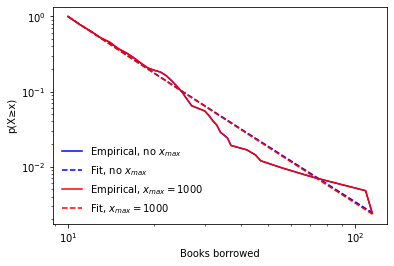

In [ ]:
#FigCCDFmax = powerlaw.plot_ccdf(data, linewidth=3)
fit = powerlaw.Fit(data, discrete=True, xmax=None)
FigCCDFmax = fit.plot_ccdf(color='b', label=r"Empirical, no $x_{max}$")
fit.power_law.plot_ccdf(color='b', linestyle='--', ax=FigCCDFmax, label=r"Fit, no $x_{max}$")
fit = powerlaw.Fit(data, discrete=True, xmax=1000)
fit.plot_ccdf(color='r', label=r"Empirical, $x_{max}=1000$")
fit.power_law.plot_ccdf(color='r', linestyle='--', ax=FigCCDFmax, label=r"Fit, $x_{max}=1000$")
#x, y = powerlaw.ccdf(data, xmax=max(data))
#fig1.plot(x,y)
####
#FigCCDFmax.set_ylabel(r"$p(X\geq x)$")
FigCCDFmax.set_ylabel(u"p(X≥x)")
FigCCDFmax.set_xlabel(r"Books borrowed")
handles, labels = FigCCDFmax.get_legend_handles_labels()
leg = FigCCDFmax.legend(handles, labels, loc=3)
leg.draw_frame(False)

In [ ]:
# scaling range
fit = powerlaw.Fit(data)
fit.xmin
fit.fixed_xmin
fit.alpha
fit.D
fit = powerlaw.Fit(data, xmin=1.0)
fit.xmin
fit.fixed_xmin
fit.alpha
fit.D

Calculating best minimal value for power law fit


0.18166288277396397

In [ ]:
fit.power_law.alpha

2.1173007615879422

In [ ]:
fit.power_law.sigma

0.014821128299463332

## books by unique borrowers

In [ ]:
# these numbers were based on pure borrow count; what if we look at number of borrowrs instead?

# load events
events_df = pd.read_csv(csv_urls['events'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# get all the borrows
borrows = events_df[events_df.event_type == 'Borrow']
borrows.shape[0]

21059

In [ ]:
borrows['item_id'] = borrows.item_uri.apply(lambda x: x.split('/')[-2])
borrows.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,event_type,start_date,end_date,member_uris,member_names,member_sort_names,subscription_price_paid,subscription_deposit,subscription_duration,subscription_duration_days,subscription_volumes,subscription_category,subscription_purchase_date,reimbursement_refund,borrow_status,borrow_duration_days,purchase_price,currency,item_uri,item_title,item_volume,item_authors,item_year,item_notes,source_type,source_citation,source_manifest,source_image,item_id
2,Borrow,1922,1922-08-23,https://shakespeareandco.princeton.edu/members...,Mr. Rhys,"Rhys, Mr.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/c...,Typhoon,NaN,"Conrad, Joseph",1902.0,NaN,Lending Library Card,"Sylvia Beach, Rhys Lending Library Card, Box 4...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/67...,conrad-typhoon
8,Borrow,1923,1923-11-07,https://shakespeareandco.princeton.edu/members...,Eyre de Lanux / Mrs. Pierre de Lanux,"de Lanux, Eyre",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/w...,Night and Day,NaN,"Woolf, Virginia",1919.0,NaN,Lending Library Card,"Sylvia Beach, Eyre de Lanux Lending Library Ca...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/c5...,woolf-night-day
12,Borrow,1924,1924-10-22,https://shakespeareandco.princeton.edu/members...,Simone Téry,"Téry, Simone",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/j...,James Joyce,NaN,NaN,NaN,Unidentified. By or about Joyce.,Lending Library Card,"Sylvia Beach, Mlle Simone Tery Lending Library...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/c2...,james-joyce
13,Borrow,1924,1924-10-22,https://shakespeareandco.princeton.edu/members...,Simone Téry,"Téry, Simone",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/f...,A Portrait of George Moore in a Study of His Work,NaN,"Freeman, John",1922.0,NaN,Lending Library Card,"Sylvia Beach, Mlle Simone Tery Lending Library...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/c2...,freeman-portrait-george-moore
22,Borrow,1926,1926-01-14,https://shakespeareandco.princeton.edu/members...,Ada (Hitchcock) MacLeish;Archibald MacLeish,"MacLeish, Ada;MacLeish, Archibald",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Returned,NaN,NaN,NaN,https://shakespeareandco.princeton.edu/books/s...,Tents of Israel,NaN,"Stern, G. B.",1924.0,NaN,Lending Library Card,"Sylvia Beach, Ada and Archibald MacLeish Lendi...",https://figgy.princeton.edu/concern/scanned_re...,https://iiif.princeton.edu/loris/figgy_prod/22...,stern-tents-israel


In [ ]:
# get unique book/person combination
uniq_borrows = borrows[['member_uris', 'item_id']].drop_duplicates()
uniq_borrows.shape[0]

19315

In [ ]:
uniq_borrow_book_counts = uniq_borrows.groupby('item_id').count().reset_index().rename(columns={'member_uris': 'borrower_count'}).sort_values('borrower_count', ascending=False)
uniq_borrow_book_counts

,item_id,borrower_count
2717,joyce-portrait-artist-young,50
2710,joyce-dubliners,45
4209,richardson-pointed-roofs,40
3294,mansfield-garden-party-stories,34
2570,isherwood-mr-norris-changes,33
...,...,...
2780,keyserling-america-set-free,1
2786,king-hall-diary-young-lady,1
2789,king-translator-dante-life,1
2793,kipling,1


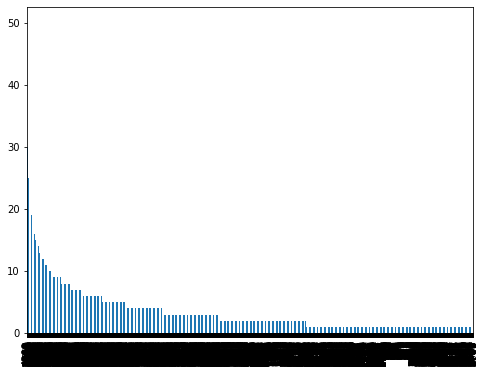

In [ ]:
uniq_borrow_book_counts.plot.bar(y='borrower_count', linewidth=0, figsize=(8, 6), legend=None)

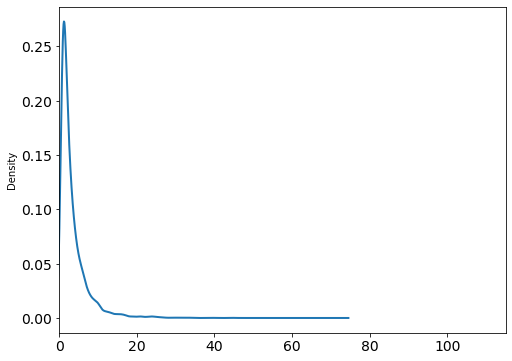

In [ ]:
uniq_borrow_book_counts.borrower_count.plot.density(figsize=(8, 6),
                               fontsize=14,
                               xlim=(0, 115),
                               linewidth=2, rot=0)

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:518: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(self.xlim)


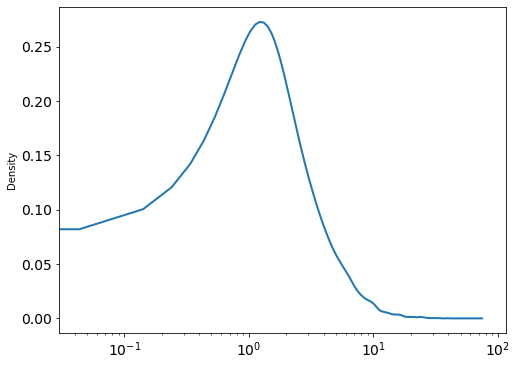

In [ ]:
# what if we plot on a log scale?
uniq_borrow_book_counts.borrower_count.plot.density(figsize=(8, 6),
                               fontsize=14,
                               xlim=(0, 115),
                               linewidth=2, logx=True)

In [ ]:
# get the counts to fit with power law
data2 = uniq_borrow_book_counts.borrower_count
data2

2717    50
2710    45
4209    40
3294    34
2570    33
        ..
2780     1
2786     1
2789     1
2793     1
2841     1
Name: borrower_count, Length: 5683, dtype: int64

In [ ]:
fit2 = powerlaw.Fit(data2)
fit2.power_law.alpha
fit2.power_law.sigma
fit2.distribution_compare('power_law', 'exponential')

Calculating best minimal value for power law fit


(1.5540902530614389, 0.121180870962726)

Calculating best minimal value for power law fit


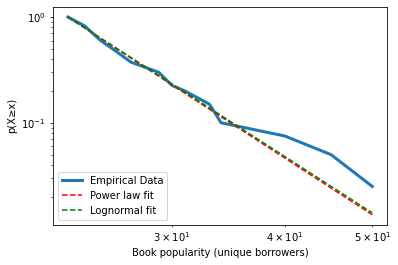

In [ ]:

fit2 = powerlaw.Fit(data2, discrete=True)
####
fit2.distribution_compare('power_law', 'lognormal')
fig2 = fit2.plot_ccdf(linewidth=3, label='Empirical Data')
fit2.power_law.plot_ccdf(ax=fig2, color='r', linestyle='--', label='Power law fit')
fit2.lognormal.plot_ccdf(ax=fig2, color='g', linestyle='--', label='Lognormal fit')
####
fig2.set_ylabel(u"p(X≥x)")
fig2.set_xlabel("Book popularity (unique borrowers)")
handles, labels = fig2.get_legend_handles_labels()
fig2.legend(handles, labels, loc=3)

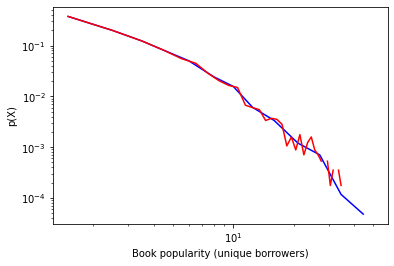

In [ ]:
figPDF = powerlaw.plot_pdf(data2, color='b')
powerlaw.plot_pdf(data2, linear_bins=True, color='r', ax=figPDF)
####
figPDF.set_ylabel("p(X)")
figPDF.set_xlabel(r"Book popularity (unique borrowers)")
# figname = 'FigPDF'
# savefig(figname+'.eps', bbox_inches='tight')
figPDF

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


/usr/local/lib/python3.7/dist-packages/powerlaw.py:1195: RuntimeWarning: divide by zero encountered in double_scalars
  C = 1.0/C
/usr/local/lib/python3.7/dist-packages/scipy/optimize/optimize.py:597: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


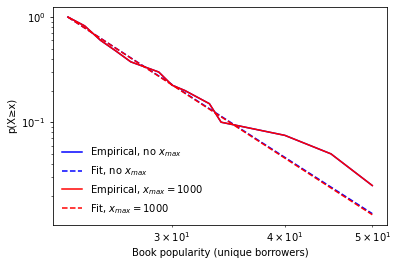

In [ ]:
#FigCCDFmax = powerlaw.plot_ccdf(data, linewidth=3)
fit2 = powerlaw.Fit(data2, discrete=True, xmax=None)
FigCCDFmax = fit2.plot_ccdf(color='b', label=r"Empirical, no $x_{max}$")
fit2.power_law.plot_ccdf(color='b', linestyle='--', ax=FigCCDFmax, label=r"Fit, no $x_{max}$")
fit2 = powerlaw.Fit(data2, discrete=True, xmax=1000)
fit2.plot_ccdf(color='r', label=r"Empirical, $x_{max}=1000$")
fit2.power_law.plot_ccdf(color='r', linestyle='--', ax=FigCCDFmax, label=r"Fit, $x_{max}=1000$")
#x, y = powerlaw.ccdf(data, xmax=max(data))
#fig1.plot(x,y)
####
#FigCCDFmax.set_ylabel(r"$p(X\geq x)$")
FigCCDFmax.set_ylabel(u"p(X≥x)")
FigCCDFmax.set_xlabel(r"Book popularity (unique borrowers)")
handles, labels = FigCCDFmax.get_legend_handles_labels()
leg = FigCCDFmax.legend(handles, labels, loc=3)
leg.draw_frame(False)

## beach's tally

> Based on a handwritten tally in the Beach papers, we know that there were 4,600 books in February 1931. 

In [ ]:
from datetime import date

# parse start date so we can compare
borrows['start_date_dt'] = pd.to_datetime(borrows['start_date'], errors='coerce')

# get all borrows up to february 28 1931
pretally_borrows = borrows[borrows.start_date_dt <= pd.to_datetime(date(1931, 2, 28))]

# how many unique books?
len(pretally_borrows.item_id.unique())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


2874

In [ ]:
pretally_borrows.borrow_status.value_counts()

Returned    6426
Unknown      190
Name: borrow_status, dtype: int64

In [ ]:
# what about only the books that were returned?
len(pretally_borrows[pretally_borrows.borrow_status == 'Returned'].item_id.unique())

2809

In [ ]:
# oh, but how do we group books so we get the *last* status?
# a book could have been returned multiple times before it is lost or bought

sorted_pretally_borrows = pretally_borrows.sort_values('start_date_dt', ascending=True)
sorted_pretally_borrows[['start_date', 'item_id', 'borrow_status']]


,start_date,item_id,borrow_status
674,1919-11-18,wilde-profundis,Returned
675,1919-11-18,hardy-trumpet-major,Returned
673,1919-11-18,meredith-diana-crossways,Returned
678,1919-11-19,james-roderick-hudson,Returned
680,1919-11-19,hazlitt-characters-shakespeares-plays,Returned
...,...,...,...
11927,1931-02-28,bronte-wuthering-heights,Returned
11928,1931-02-28,peck-shelley-life-work,Returned
11929,1931-02-28,swift-choice-works-dean,Returned
11930,1931-02-28,galsworthy-forsyte-saga,Returned


In [ ]:
# drop duplicates based only on item id; keep the last entry
pretally_borrow_laststatus = sorted_pretally_borrows.drop_duplicates(subset=['item_id'], keep='last')
pretally_borrow_laststatus[['start_date', 'item_id', 'borrow_status']]

,start_date,item_id,borrow_status
686,1919-11-24,butler-pigs-pigs,Returned
701,1919-12-01,arens-playboy-portfolio-art,Unknown
705,1919-12-02,webster-white-devil,Returned
706,1919-12-02,unclear-ile,Returned
713,1919-12-04,harte-idyls-foothills-prose,Returned
...,...,...,...
11927,1931-02-28,bronte-wuthering-heights,Returned
11928,1931-02-28,peck-shelley-life-work,Returned
11929,1931-02-28,swift-choice-works-dean,Returned
11930,1931-02-28,galsworthy-forsyte-saga,Returned


In [ ]:
pretally_borrow_laststatus.borrow_status.value_counts()

Returned    2765
Unknown      109
Name: borrow_status, dtype: int64

In [ ]:
pretally_borrow_laststatus[pretally_borrow_laststatus.borrow_status == 'Returned'][['start_date', 'item_id', 'borrow_status']]

,start_date,item_id,borrow_status
686,1919-11-24,butler-pigs-pigs,Returned
705,1919-12-02,webster-white-devil,Returned
706,1919-12-02,unclear-ile,Returned
713,1919-12-04,harte-idyls-foothills-prose,Returned
714,1919-12-04,thompson-shelley,Returned
...,...,...,...
11927,1931-02-28,bronte-wuthering-heights,Returned
11928,1931-02-28,peck-shelley-life-work,Returned
11929,1931-02-28,swift-choice-works-dean,Returned
11930,1931-02-28,galsworthy-forsyte-saga,Returned


In [ ]:
# double check
len(pretally_borrow_laststatus[pretally_borrow_laststatus.borrow_status == 'Returned'].item_id.unique())

2765

In [ ]:
2765 / 4600

0.6010869565217392